# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm, zscore, pearsonr
import statsmodels.api as sm
from sklearn.metrics import pairwise_distances

# Load and Format

In [3]:
df = pd.read_csv('data.csv')
df = df.set_index('datetime')
df

,02t,03t,11t,12t,50t,52t,53t,54t,59t,61t,...,bkp85t,19t,o63,bkp90t,bkp88t,bkp86t,bkp94t,bkp84t,bkp83t,bkp63t
datetime,,,,,,,,,,,,,,,,,,,,,
2025-01-19 01:00:00,55.5,51.7,47.1,44.2,50.1,54.5,49.9,44.9,36.9,41.1,...,62.1,55.7,54.1,50.1,66.9,65.2,48.2,52.7,51.0,49.6
2025-01-19 02:00:00,60.3,56.6,48.1,48.1,54.0,60.7,55.5,55.1,37.4,47.4,...,63.8,45.9,55.0,52.6,63.1,64.1,51.5,55.2,52.0,54.7
2025-01-19 03:00:00,57.9,58.1,46.2,45.8,55.3,56.0,56.7,46.8,40.9,44.9,...,69.8,40.5,47.3,54.4,68.0,78.9,56.4,58.8,49.0,56.9
2025-01-19 04:00:00,55.2,55.3,40.3,43.1,48.6,55.1,45.5,40.5,45.2,40.1,...,77.6,43.4,45.2,53.2,69.1,73.7,50.8,60.2,45.0,56.1
2025-01-19 05:00:00,60.7,60.3,40.9,44.5,47.9,58.4,45.1,41.4,47.2,41.1,...,92.0,50.8,53.1,70.5,72.0,74.6,49.1,76.5,41.0,48.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-18 10:00:00,25.5,27.2,24.9,24.9,28.7,25.0,29.9,28.7,14.0,24.2,...,26.3,24.3,24.9,27.1,21.0,20.2,17.1,52.6,25.0,21.9
2025-02-18 11:00:00,28.1,26.7,21.1,21.9,25.4,27.5,24.2,27.3,14.9,21.0,...,27.4,23.5,22.5,19.8,28.8,16.6,17.0,22.2,18.0,29.5
2025-02-18 12:00:00,NaN,24.3,20.2,20.9,25.0,25.1,24.3,24.1,15.2,20.9,...,26.5,23.7,20.6,NaN,25.1,35.4,16.1,22.1,20.0,28.1


# EDA

In [4]:
df.describe()

,02t,03t,11t,12t,50t,52t,53t,54t,59t,61t,...,bkp85t,19t,o63,bkp90t,bkp88t,bkp86t,bkp94t,bkp84t,bkp83t,bkp63t
count,731.000000,732.000000,734.000000,734.000000,733.000000,730.000000,734.000000,734.000000,734.000000,727.000000,...,732.000000,729.000000,733.000000,731.000000,732.000000,734.000000,734.000000,733.000000,730.000000,732.000000
mean,49.652804,49.651639,42.123161,42.178065,47.274352,49.191781,46.574659,49.674114,35.867847,41.644704,...,55.073361,42.465981,43.321010,45.394802,55.671858,48.058174,54.107493,48.540791,45.383699,48.592213
std,18.691237,19.997426,15.057354,15.174247,17.136868,18.875035,17.611950,17.455395,13.119240,14.913804,...,21.317001,18.515011,16.089138,21.847879,53.049562,22.921667,71.853561,20.212515,18.725374,17.985667
min,13.400000,12.900000,10.200000,10.500000,14.700000,13.400000,13.100000,13.800000,7.200000,10.600000,...,4.600000,16.800000,11.200000,4.600000,12.200000,7.500000,10.700000,5.200000,8.000000,14.000000
25%,36.650000,35.575000,30.825000,31.200000,35.100000,36.200000,33.900000,37.225000,25.625000,30.400000,...,40.775000,31.600000,31.500000,31.500000,37.900000,31.925000,35.100000,35.100000,33.000000,36.100000
50%,44.900000,45.500000,39.900000,39.800000,44.300000,44.200000,43.550000,47.500000,35.300000,39.700000,...,49.400000,37.900000,40.200000,40.600000,47.950000,43.200000,45.550000,44.000000,42.000000,46.100000
75%,60.750000,60.150000,50.800000,50.900000,56.400000,60.000000,55.800000,59.675000,45.100000,50.450000,...,64.725000,47.300000,54.100000,54.600000,64.300000,58.600000,59.600000,57.700000,56.000000,57.900000
max,122.300000,117.300000,94.700000,91.700000,121.500000,117.000000,117.300000,112.500000,75.800000,93.300000,...,144.000000,190.000000,98.000000,145.600000,983.700000,143.400000,985.000000,127.100000,121.900000,125.400000


## handle NaN

In [5]:
df.isna().sum().sum()

302

In [6]:
while True:
    nan = df.isna().sum().sum()
    print(f"NaN count: {nan}")
    if nan == 0:
        break
    # use median to be more robust against outliers
    df.fillna(df.rolling(window=24, min_periods=1).median(), inplace=True) 

NaN count: 302
NaN count: 18
NaN count: 0


## handle outliers

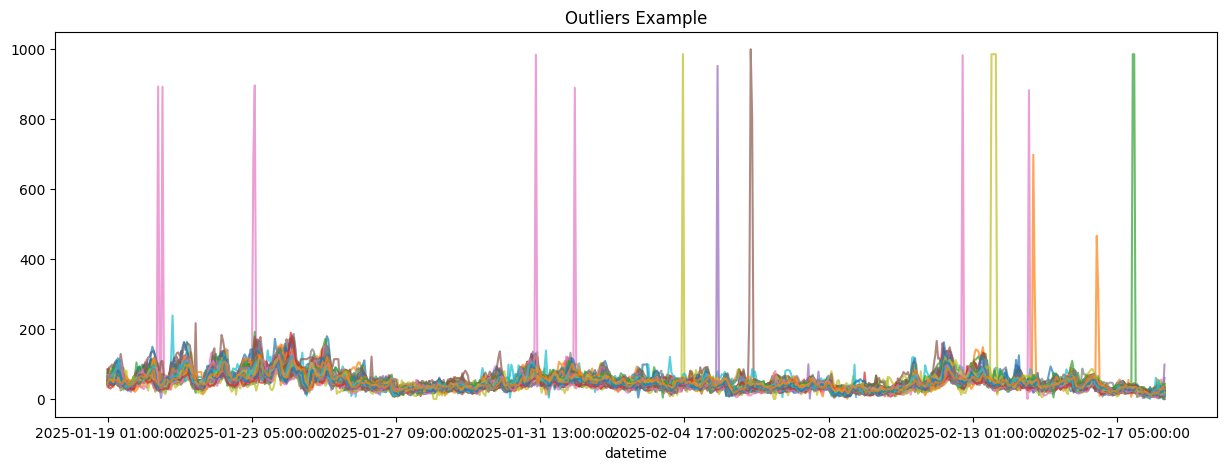

In [7]:
# some sensors' readings are outliers
df.plot(figsize=(15,5), alpha=0.7)
plt.title("Outliers Example")
plt.legend([], [], frameon=False)
plt.show()

In [8]:
z_scores = np.abs(df.apply(zscore))
z_scores.describe()

,02t,03t,11t,12t,50t,52t,53t,54t,59t,61t,...,bkp85t,19t,o63,bkp90t,bkp88t,bkp86t,bkp94t,bkp84t,bkp83t,bkp63t
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,...,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,0.792736,0.779348,0.796366,0.795922,0.772048,0.789500,0.777530,0.779109,0.812352,0.794526,...,0.775500,0.661578,0.815912,0.748500,0.376057,0.767334,0.304831,0.761548,0.773735,0.765310
std,0.609981,0.627018,0.605228,0.605813,0.635998,0.614169,0.629274,0.627316,0.583564,0.607644,...,0.631778,0.750387,0.578570,0.663587,0.927228,0.641685,0.953056,0.648551,0.633941,0.644100
min,0.001013,0.000811,0.005107,0.001447,0.002497,0.000679,0.001440,0.007217,0.002452,0.002966,...,0.001805,0.000303,0.000627,0.003677,0.001459,0.001826,0.000104,0.000465,0.017382,0.000645
25%,0.368227,0.324211,0.333829,0.328284,0.325571,0.375578,0.329527,0.297363,0.340789,0.319799,...,0.316586,0.254653,0.384724,0.301963,0.158212,0.304148,0.103301,0.291414,0.344116,0.323782
50%,0.662550,0.635042,0.669687,0.674096,0.641967,0.643876,0.639206,0.627741,0.734701,0.677077,...,0.612575,0.498766,0.720352,0.579630,0.289469,0.643935,0.210293,0.612952,0.620016,0.615632
75%,1.044013,1.088416,1.107418,1.113042,1.053620,1.049959,1.072466,1.121453,1.145365,1.108508,...,1.058548,0.828417,1.181227,1.008958,0.444248,1.050120,0.330167,0.998055,1.040434,1.019875
max,3.891421,3.386032,3.494152,3.265777,4.333698,3.593668,4.018497,3.601679,3.045861,3.482187,...,4.179620,7.996220,3.400415,4.594900,17.527570,4.162299,12.964246,3.880849,4.096248,4.279424


In [9]:
df[z_scores > 3.75] = np.nan
while True:
    nan = df.isna().sum().sum()
    print(f"NaN count: {nan}")
    if nan == 0:
        break
    # use mean as there are no outliers
    df.fillna(df.rolling(window=24, min_periods=1).mean(), inplace=True) 

NaN count: 193
NaN count: 0


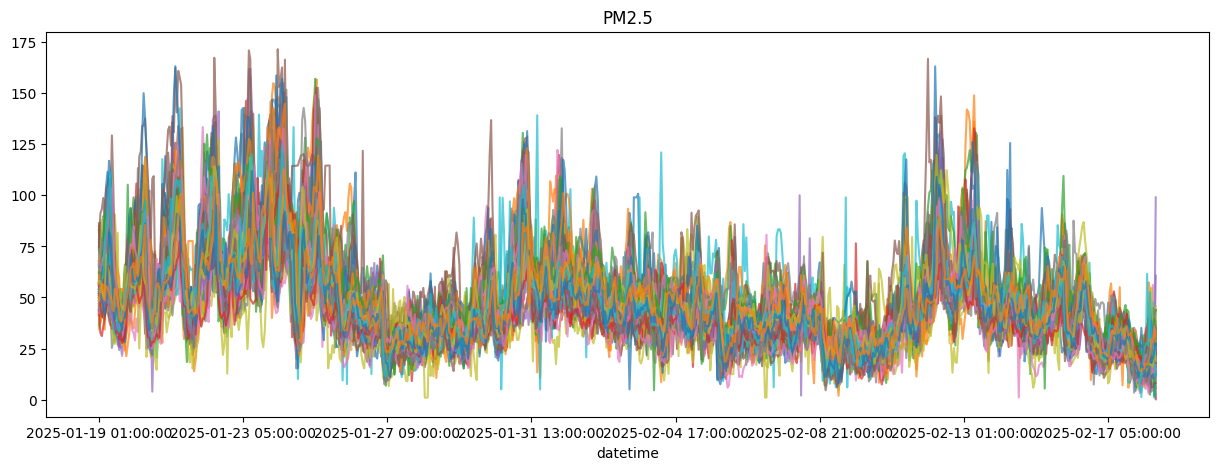

In [10]:
df.plot(figsize=(15,5), alpha=0.7)
plt.title("PM2.5")
plt.legend([], [], frameon=False)
plt.show()

## Temporal Analysis

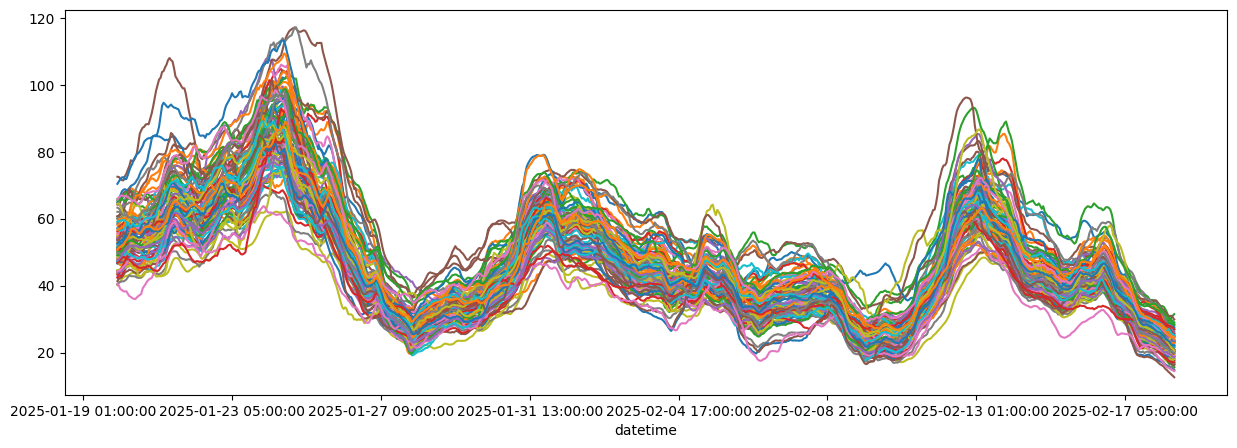

In [11]:
df.rolling(window=24).mean().plot(figsize=(15,5))
plt.legend([], [], frameon=False)

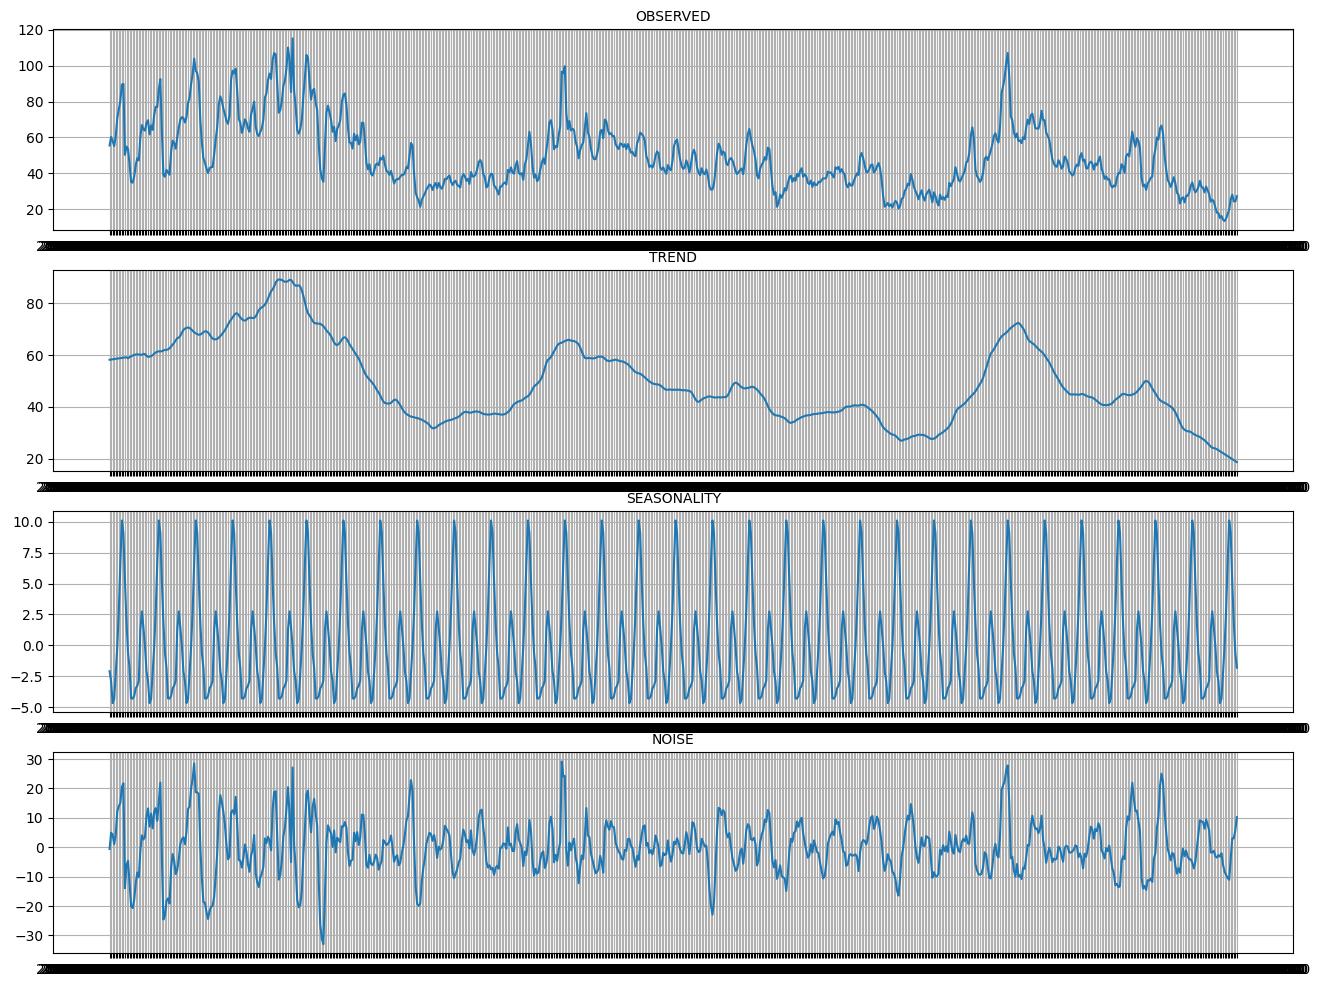

In [12]:
res=sm.tsa.seasonal_decompose(df.iloc[:, 0],model='additive',extrapolate_trend ='freq',period=24)

fig, axs = plt.subplots(4, figsize=(16,12))

axs[0].set_title('OBSERVED', fontsize=10)
axs[0].plot(res.observed)
axs[0].grid()

axs[1].set_title('TREND', fontsize=10)
axs[1].plot(res.trend)
axs[1].grid()

axs[2].set_title('SEASONALITY', fontsize=10)
axs[2].plot(res.seasonal)
axs[2].grid()

axs[3].set_title('NOISE', fontsize=10)
axs[3].plot(res.resid)
axs[3].grid()

plt.legend([], [], frameon=False)
plt.show()

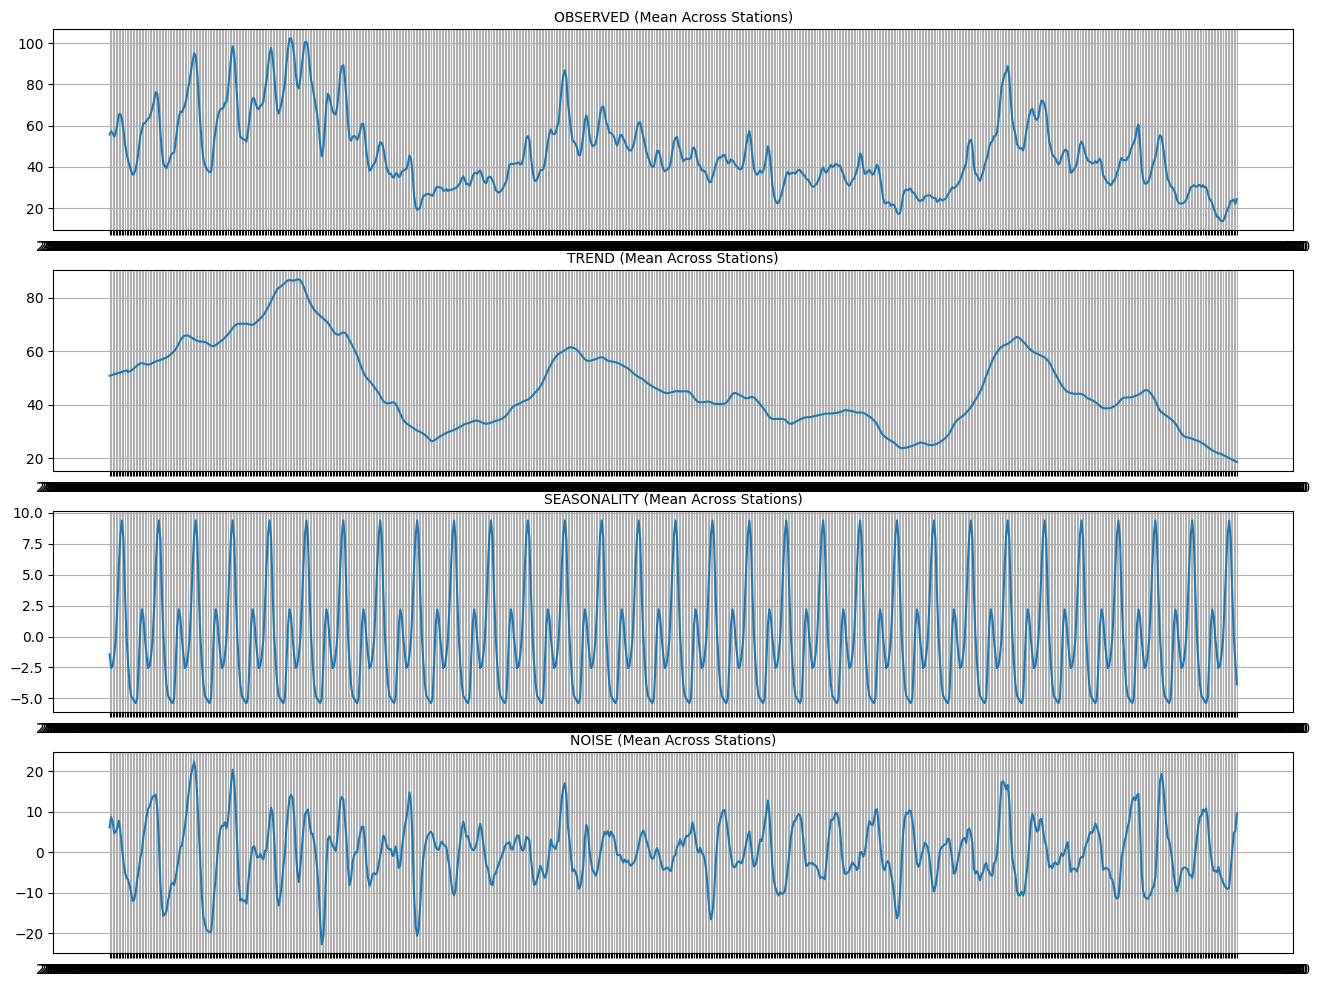

In [13]:
# try aggregrating all stations

period = 24

# Store decomposed components
trends = []
seasonals = []
residuals = []
observed = []

# Loop through all station columns
for station in df.columns:
    res = sm.tsa.seasonal_decompose(df[station], model='additive', extrapolate_trend='freq', period=24)
    
    trends.append(res.trend)
    seasonals.append(res.seasonal)
    residuals.append(res.resid)
    observed.append(res.observed)

# Aggregate results
trends = np.nanmean(np.array(trends), axis=0)
seasonals = np.nanmean(np.array(seasonals), axis=0)
residuals = np.nanmean(np.array(residuals), axis=0)
observed = np.nanmean(np.array(observed), axis=0)


fig, axs = plt.subplots(4, figsize=(16, 12))

axs[0].set_title('OBSERVED (Mean Across Stations)', fontsize=10)
axs[0].plot(df.index, observed)
axs[0].grid()

axs[1].set_title('TREND (Mean Across Stations)', fontsize=10)
axs[1].plot(df.index, trends)
axs[1].grid()

axs[2].set_title('SEASONALITY (Mean Across Stations)', fontsize=10)
axs[2].plot(df.index, seasonals)
axs[2].grid()

axs[3].set_title('NOISE (Mean Across Stations)', fontsize=10)
axs[3].plot(df.index, residuals)
axs[3].grid()

plt.legend([], [], frameon=False)
plt.show()

In [14]:
t = pd.DataFrame({"observed":observed, "trends":trends, "seasonals":seasonals, "residuals":residuals})
t.describe()

,observed,trends,seasonals,residuals
count,734.000000,734.000000,734.000000,734.000000
mean,46.450361,46.418594,0.031493,0.000273
std,17.806860,15.227287,4.319861,7.263032
min,13.690217,18.652373,-5.379248,-22.687613
25%,33.998370,34.789285,-2.544578,-4.527874
50%,42.329728,43.471693,-0.204230,-0.047009
75%,55.586957,57.313458,2.400344,4.595985
max,102.266400,86.846780,9.385121,22.383086


### Seasonality Interpretation

- The mean of the observed and trends are very close -> the data is somewhat stable
- There are seasonal trends which are daily patterns (due to how the whole set is 1 month long and there are roughly 30 periods)
- Residuals are prevelant with a STDEV of 7.263 which is great than 4.320 of the seasonality

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

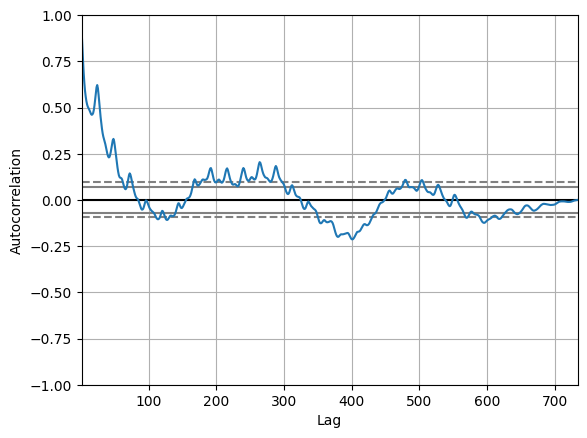

In [15]:
pd.plotting.autocorrelation_plot(df)

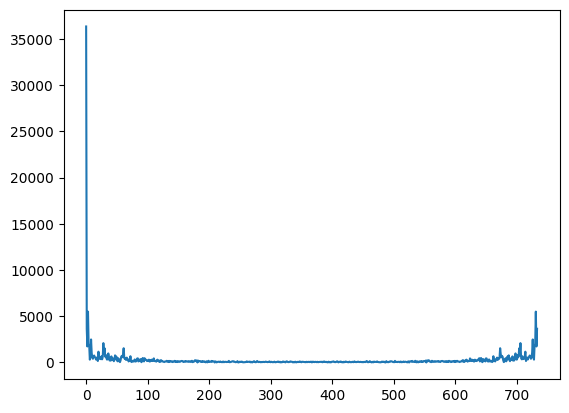

In [16]:
freq_spectrum = np.fft.fft(df.iloc[:, 0].dropna())
plt.plot(np.abs(freq_spectrum))
plt.show()

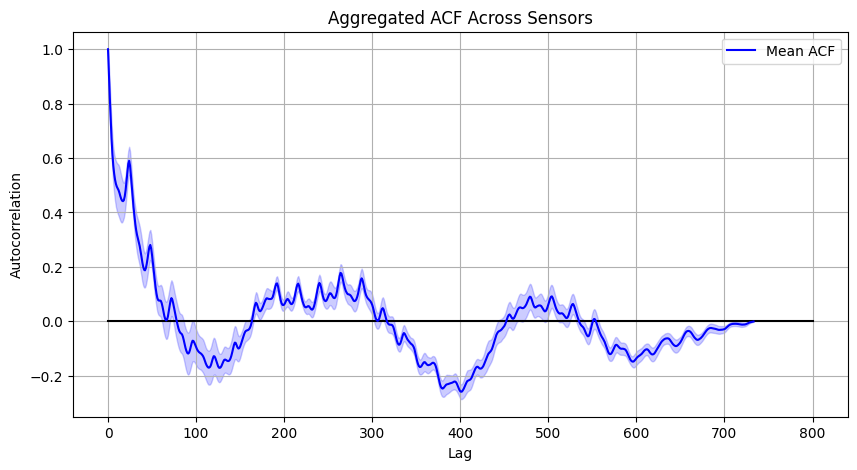

In [17]:
max_lag = 800
acf_values = []

# Compute ACF for each column
for col in df.columns:
    acf_result = sm.tsa.stattools.acf(df[col].dropna(), nlags=max_lag, fft=True)  # ACF
    acf_values.append(acf_result)

# Convert to DataFrame and compute mean across all sensors
acf_matrix = np.array(acf_values)  # Shape: (num_sensors, max_lag+1)
mean_acf = np.mean(acf_matrix, axis=0)
std_acf = np.std(acf_matrix, axis=0)

# Plot the aggregated ACF
plt.figure(figsize=(10, 5))
plt.plot(np.zeros(max_lag+1), color="black") 
plt.plot(range(len(mean_acf)), mean_acf, label="Mean ACF", color='b')
plt.fill_between(range(len(mean_acf)), mean_acf - std_acf, mean_acf + std_acf, color='b', alpha=0.2)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Aggregated ACF Across Sensors")
plt.legend()
plt.grid()
plt.show()


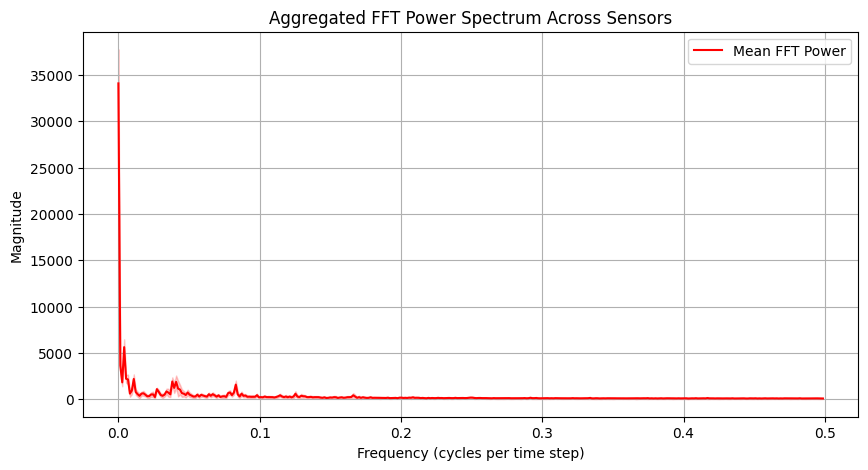

In [18]:
# Define variables
n = len(df)  # Number of time steps
freqs = np.fft.fftfreq(n)  # Frequency axis
fft_values = []

# Compute FFT for each sensor
for col in df.columns:
    fft_result = np.fft.fft(df[col].dropna())
    fft_values.append(np.abs(fft_result))  # Store magnitude of FFT

# Convert to array and compute mean power spectrum
fft_matrix = np.array(fft_values)  # Shape: (num_sensors, n)
mean_fft = np.mean(fft_matrix, axis=0)
std_fft = np.std(fft_matrix, axis=0)

# Plot the aggregated FFT spectrum (Only positive frequencies)
plt.figure(figsize=(10, 5))
plt.plot(freqs[:n//2], mean_fft[:n//2], label="Mean FFT Power", color='r')
plt.fill_between(freqs[:n//2], mean_fft[:n//2] - std_fft[:n//2], mean_fft[:n//2] + std_fft[:n//2], color='r', alpha=0.2)
plt.xlabel("Frequency (cycles per time step)")
plt.ylabel("Magnitude")
plt.title("Aggregated FFT Power Spectrum Across Sensors")
plt.legend()
plt.grid()
plt.show()


### ACF&FFT Interpretation

- There is a large autocorrelation in small lags (To be expected)
- There seems to be some seasonal elements at around 1.1 and 2.5 hour cycle, however, they are very small and are likely neglectible.

## Spatial Analysis

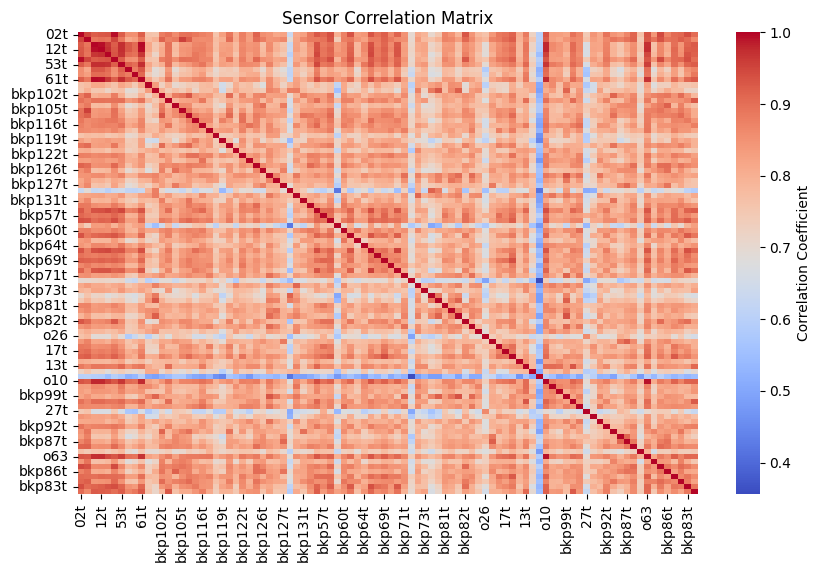

In [19]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Sensor Correlation Matrix")
plt.show()


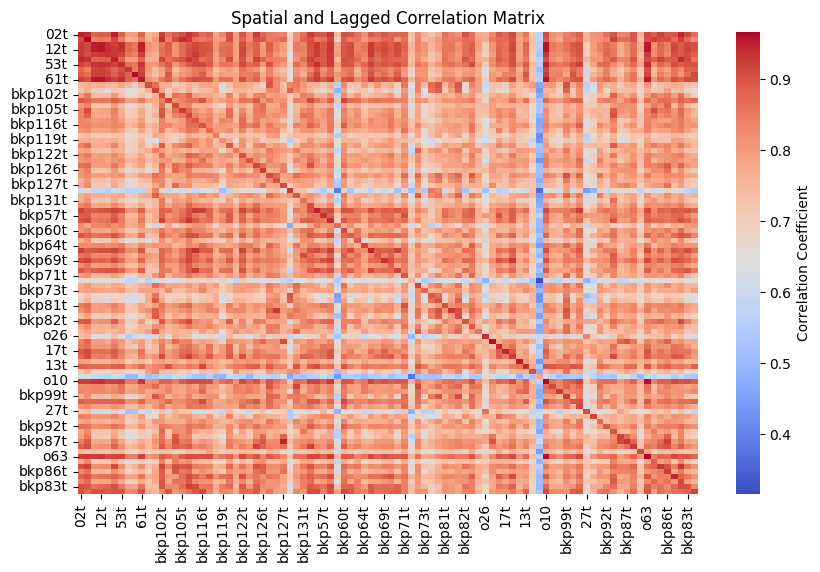

In [20]:
lag = 1

# Shift the data by lag (you can shift by more than 1 if needed)
df_lagged = df.shift(lag)

# Initialize an empty DataFrame to store correlations
lagged_corr_matrix = pd.DataFrame(index=df.columns, columns=df.columns)

# Calculate the correlation between original and lagged readings for each pair of stations
for station1 in df.columns:
    for station2 in df.columns:
        # Drop any NaN values from both series (for matching indices)
        corr_value = df[station1].dropna().corr(df_lagged[station2].dropna())
        lagged_corr_matrix.loc[station1, station2] = corr_value

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(lagged_corr_matrix.astype(float), annot=False, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Spatial and Lagged Correlation Matrix")
plt.show()

### Heatmap Interpretation

- There are many stations that shows correlation only with lag 
- This is likely due to it being up or down wind from the other stations
- For example o63 which is in บางนา.

In [21]:
df_geo = pd.read_csv('addr_latlong.csv')
df_geo = df_geo.set_index('sensor_id')
df_geo = df_geo[["latitude", "longitude"]]
df_geo

,latitude,longitude
sensor_id,,
02t,13.732270,100.490197
03t,13.642662,100.409519
11t,13.776413,100.572275
12t,13.707317,100.547104
50t,13.732501,100.536086
...,...,...
bkp86t,13.781345,100.426387
bkp94t,13.708162,100.583706
bkp84t,13.729275,100.473354


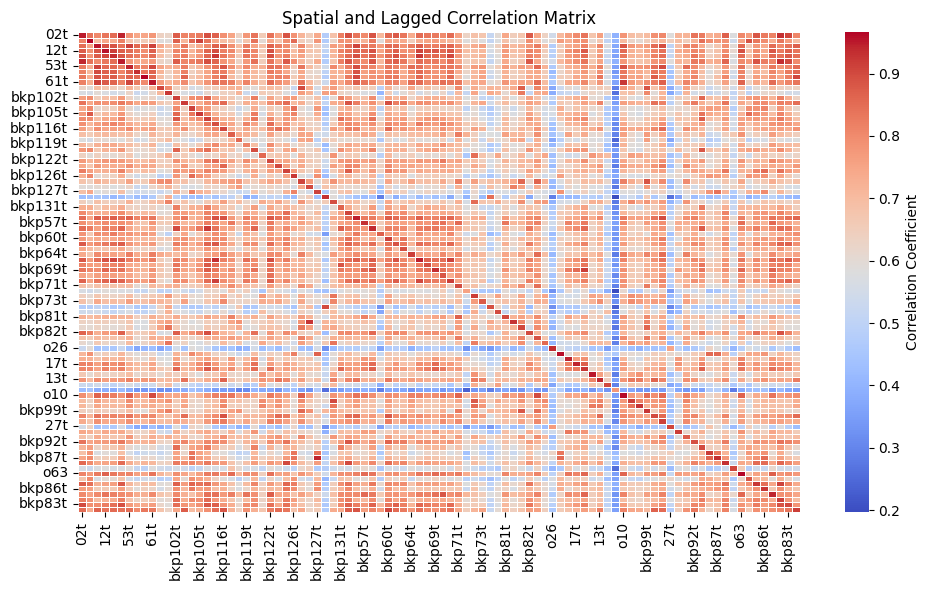

In [22]:
# Compute distance matrix between stations (Euclidean or Haversine)
dist_matrix = pairwise_distances(df_geo[['latitude', 'longitude']])

# Compute the correlation matrix between stations considering lagged data
lagged_corr_matrix = pd.DataFrame(index=df.columns, columns=df.columns)

for station1 in df.columns:
    for station2 in df.columns:
        # Get the lagged correlation for each station pair
        corr_value = pearsonr(df.iloc[1:][station1], df_lagged.iloc[1:][station2])[0]
        lagged_corr_matrix.loc[station1, station2] = corr_value

# Optionally weight the correlation by distance
# Normalize distance to weight inversely (closer stations get higher weight)
normalized_dist_matrix = 1 / (1 + dist_matrix)  # Example weight (inverse of distance)

# Optionally combine this with your lagged correlation matrix, e.g., by multiplying
weighted_corr_matrix = lagged_corr_matrix * normalized_dist_matrix
weighted_corr_matrix = weighted_corr_matrix.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(10,6))
sns.heatmap(weighted_corr_matrix.astype(float), annot=False, cmap="coolwarm", fmt=".2f", 
            cbar_kws={'label': 'Correlation Coefficient'},
            linewidths=0.5,
            cbar=True)

plt.title("Spatial and Lagged Correlation Matrix")
plt.tight_layout()
plt.show()
